# **Chi-Square Test with Cookie Cats, the Mobile Game**

# **Project Description**

Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three" style puzzle game where the player must connect tiles of the same color in order to clear the board and win the level. It also features singing cats. We're not kidding!

As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention.

The dataset is from 90,189 players that installed the game while the AB-test was running. When a player installed the game, that player was randomly assigned to either of the versions: gate_30 or gate_40. For the A/B testing, the control group is gate_30 and the Experiment group is gate_40, test group.

# Task
Perform A/B test, between two categorical varibles, under the verison column, gate_30 (the control group) and gate_40 (the Experiment group). Have insight of dataset and handle outliers if any. To determine, whether moving the gate from level 30 to level 40 is worth of doing, and does it not harm the retention rate. 

Assuming the puzzled piece from the marketing department requested from the data analyst: which level,  30 or 40, is more appropriate to set the gate forcing players to wait and watch advertisment or in-app purchase, without impact on rention rate?

Two A/B tests: one on retention 1, and the other on retention 7


Null Hypothesis:


Ho: There is no change of relationship in retention between gate_30 (the control group) and gate_40 (the Experiment group)

Alternative Hypothesis:


Ha: There is change of relationship in retention between gate_30 (the control group) and gate_40 (the Experiment group)

Did the player return to the game, and play 1 day after installaion?

Did the player return to the game, and play 7 days after installaion?



source of information: https://learn.datacamp.com/projects/184



# Video demo, the Cookie Cats game, YouTube:

https://youtu.be/LLVD72FuRlw

The **variables** are:</p>
**userid** - a unique number of each player. 

**version** - whether the player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).

**sum_gamerounds** - the number of game rounds played by the player during the first week after installation

**retention_1** - did the player return, and play 1 day after installaion? True or False

**retention_7** - did the player return, and play 7 days after installaion? True or False

# **1. Loading raw data & EDA**


In [ ]:
# Load dataset; actions to confirm upload completion and check for missing data, missing value, or NaN,
# as the following:

import pandas as pd
import numpy as np

url_data = 'cookie_cats.csv'

df = pd.read_csv(url_data)

df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [ ]:
# Dobule check upload completion

df.shape

(90189, 5)

In [ ]:
# CHECK missing data, missing value, or NaN
# The dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [ ]:
# Check if there is duplicated users in the control group (gate_30) and the Experiment group (gate_40), test group.
# By checking the number of unique value under the userid column, as long as the total users and total different users are the same, there is no duplicated users.

print("Total users:", df['userid'].count())
print("Total different users':", df['userid'].nunique())

Total users: 90189
Total different users': 90189


In [ ]:
# Number of players in each group is about the same, gate_30 and gate_40, 
# It meant the dataset is good for testing.
# df.groupby('version').count(), as actual count in each group

# Relative frequency of experimental condition.  Multiply by 100 to convert from
# proportions to percents as percent_group
percent_group = df['version'].value_counts(normalize = True) *100
percent_group

gate_40    50.437415
gate_30    49.562585
Name: version, dtype: float64

[Text(0, 0.5, 'Total players'),
 Text(0.5, 0, 'version'),
 Text(0.5, 1.0, 'Total players by version')]

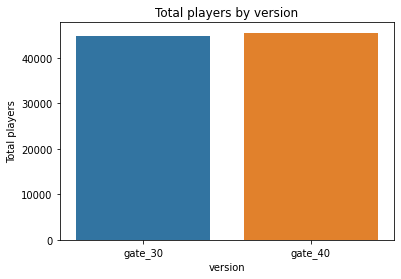

In [ ]:
# Number of players in each group is about the same, gate_30 and gate_40, in chart

import seaborn as sns

chart_version=sns.countplot(x='version' ,data=df)
chart_version.set(xlabel="version", ylabel="Total players",title='Total players by version')

# **2. Insight of dataset and handling outliers**

The following boxplot indicates the distribution of the number of game rounds played per userid, per person, in inspection of outliers.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


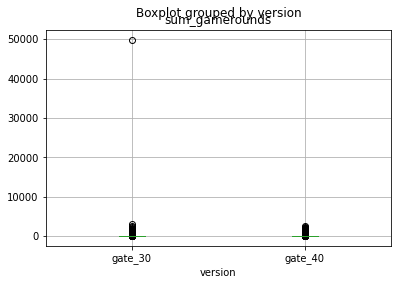

In [ ]:
# The box plot clearly spot an outlier, a person played about 50,000 rounds of game in a week.
# We need to exclude the outlier from analysis.

import matplotlib.pyplot as plt

#df.boxplot(by='version')

df.boxplot(column='sum_gamerounds', by='version')
plt.show()

In [ ]:
# The outlier is identified as the one, the max, who played 49,854 rounds.
# Mean is 51 rounds and 25% of players have less than 5 rounds during the first 7 days

df.describe([0.01, 0.05, 0.10, 0.25, 0.75, 0.90, 0.95, 0.99])[["sum_gamerounds"]]

,sum_gamerounds
count,90189.000000
mean,51.872457
std,195.050858
min,0.000000
1%,0.000000
5%,1.000000
10%,1.000000
25%,5.000000
50%,16.000000
75%,51.000000


In [ ]:
# Exclude the outlier in the dataset, renamed dataframe as df_no_outlier
# .info() shown the assurance, the outlier is excluded from the dataset

df_no_outlier = df[df.sum_gamerounds < df.sum_gamerounds.max()]

df_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90188 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90188 non-null  int64 
 1   version         90188 non-null  object
 2   sum_gamerounds  90188 non-null  int64 
 3   retention_1     90188 non-null  bool  
 4   retention_7     90188 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.9+ MB


# **3. Chi-Square test, A/B test, per Retention 7 and Retention 1**

In [ ]:

# Row Index Name Change, Purpose: associate to the interpretation on Chi-Square test by name change to Control and Experiment Group

# Name Change, before
print(df_no_outlier.head())

# Name Change. Change, gate_30, to Control, shown as the control group
# Name Change. Change, gate_40, to Experiment, shown as the Experiment group

df_no_outlier['version'] = df_no_outlier['version'].replace('gate_30', 'Control')
df_no_outlier['version'] = df_no_outlier['version'].replace('gate_40', 'Experiment')

# Retention 7 and Retention 1 columns, value name change from Ture and False, to 1 and 0
df_no_outlier['retention_1'] = df_no_outlier['retention_1'].replace(True, 1).astype(int)
df_no_outlier['retention_7'] = df_no_outlier['retention_7'].replace(True, 1).astype(int)

# Name Change, after
df_no_outlier.head()

   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,Control,3,0,0
1,337,Control,38,1,0
2,377,Experiment,165,1,0
3,483,Experiment,1,0,0
4,488,Experiment,179,1,1


In [ ]:

# Marginal distribution, Retention 1 and Retention 7

Marginal_dist_R1 = pd.crosstab(index= df_no_outlier['version'], columns=df_no_outlier['retention_1'], margins= True )
Marginal_dist_R7 = pd.crosstab(index= df_no_outlier['version'], columns=df_no_outlier['retention_7'], margins= True )

print(Marginal_dist_R1)
print(Marginal_dist_R7)

retention_1      0      1    All
version                         
Control      24665  20034  44699
Experiment   25370  20119  45489
All          50035  40153  90188
retention_7      0      1    All
version                         
Control      36198   8501  44699
Experiment   37210   8279  45489
All          73408  16780  90188


In [ ]:
# Conditional distribution on retention 1
# Multiply by 100 to show percentage than proprotions.

conditional_dist_R1 = pd.crosstab(index= df_no_outlier['version'], columns=df_no_outlier['retention_1'], margins= True, normalize='index' )*100
conditional_dist_R1

retention_1,0,1
version,,
Control,55.180205,44.819795
Experiment,55.771725,44.228275
All,55.478556,44.521444


In [ ]:
#Conditional distribution on retention 7
#Multiply by 100 to show percentage than proprotions.

conditional_dist_R7 = pd.crosstab(index= df_no_outlier['version'], columns=df_no_outlier['retention_7'], margins= True, normalize='index' )*100
conditional_dist_R7

retention_7,0,1
version,,
Control,80.981677,19.018323
Experiment,81.799996,18.200004
All,81.394421,18.605579


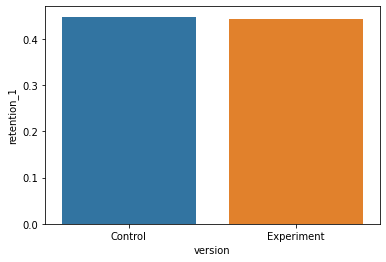

In [ ]:
# Visualize, per retention_1, the relationship between the control (gate_30) and experiment (gate_40) group by a barplot

import matplotlib.pyplot as plt
import seaborn as sns 

#CI = none gets rid of unhelpful error bars.
sns.barplot(x= 'version', y = 'retention_1', data= df_no_outlier, ci= None)  

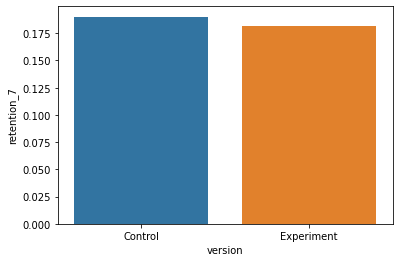

In [ ]:
# Visualize, per retention_7, the relationship between the control (gate_30) and experiment (gate_40) group by a barplot

import matplotlib.pyplot as plt
import seaborn as sns 

#CI = none gets rid of unhelpful error bars.
sns.barplot(x= 'version', y = 'retention_7', data= df_no_outlier, ci= None)  

In [ ]:
# Perform Chi-Square Test by calculating the P value

from scipy.stats import chi2_contingency

# retention_1, Chi-Square test result values as the following:

g, p, dof, expctd =  chi2_contingency(pd.crosstab(index=df["version"], columns=df["retention_1"]))

print('retention_1, chi statistic is', g)
print('retention_1, p-value is', p)
print('retention_1, degree of freedom is', dof)
print('retention_1, expected results is', expctd)


# retention_7, Chi-Square test result values as the following:
g, p, dof, expctd =  chi2_contingency(pd.crosstab(index=df["version"], columns=df["retention_7"]))

print('retention_7, chi statistic is', g)
print('retention_7, p-value is', p)
print('retention_7, degree of freedom is', dof)
print('retention_7, expected results is', expctd)

df_no_outlier.head()

retention_1, chi statistic is 3.1591007878782262
retention_1, p-value is 0.07550476210309086
retention_1, degree of freedom is 1
retention_1, expected results is [[24799.13514952 19900.86485048]
 [25236.86485048 20252.13514952]]
retention_7, chi statistic is 9.959086799559167
retention_7, p-value is 0.0016005742679058301
retention_7, degree of freedom is 1
retention_7, expected results is [[36382.90257127  8317.09742873]
 [37025.09742873  8463.90257127]]


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,Control,3,0,0
1,337,Control,38,1,0
2,377,Experiment,165,1,0
3,483,Experiment,1,0,0
4,488,Experiment,179,1,1



By calculation,

retention_1, p-value is 0.0755

retention_7, p-value is 0.0016

Chi-Square Test, conclusion,

At 95% confidence level, at p-value 0.05 significance level, we conclude:

retention_1, p-value, 0.0755, higher than the 0.05 significance level, it failed to reject the null hypothesis, and there is no statistical significant relationship between the control (gate_30) and experiment (gate_40) group. 

retention_7, p-value, 0.0016, lower than the 0.05 significance level, it rejects the null hypothesis, and there is statistical significant relationship between the control (gate_30) and experiment (gate_40) group.

At the retention_1, most probably it is just one day after installation, and too soon to examine the significance level, but the retention 1 test leads to the conclusion either 1 or 7 days after installation, the retention rate is about the same.

At the retention_7, 7 days after installation, either the gate at level 30 or level 40 would not harm the rention rate, proven statistally by Chi-Square test. Therefore, to keep retention rate high, it is not necessary to move the gate from level 30 to level 40. There is no impact on retention rate, either the gate at level 30 or level 40.



In [ ]:
#gate_40, the experiment group; gate_40, the control group

df_no_outlier['version'].value_counts()

Experiment    45489
Control       44699
Name: version, dtype: int64

In [ ]:
#gate_40, the experiment group; gate_40, the control group
#proportions to percents without outliers

df_no_outlier['version'].value_counts(normalize = True) *100

Experiment    50.437974
Control       49.562026
Name: version, dtype: float64

In [ ]:
#Joint distribution

##joint_dist = pd.crosstab(index= ABtest['Group'], columns= ABtest['Click'])
#print(joint_dist)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [ ]:
def g30_to_1(x):
  return ((x['version'] == 'gate_30') & (x['retention_1'] == True))
df['Experiment_gate_30'] = df.apply(g30_to_1, axis=1)
df['Experiment_gate_30'] = df['Experiment_gate_30'].replace({True: 1})
df['Experiment_gate_30'] = df['Experiment_gate_30'].replace({False: 0})

def g30_to_0(y):
  return ((y['version'] == 'gate_30') & (y['retention_1'] == True))
df['Control_gate_30'] = df.apply(g30_to_0, axis=1)
df['Control_gate_30'] = df['Control_gate_30'].replace({False: 0})
df['Control_gate_30'] = df['Control_gate_30'].replace({True: 1})

##
def g40_to_1(a):
  return ((a['version'] == 'gate_40') & (a['retention_1'] == True))
df['Experiment_gate_40'] = df.apply(g30_to_1, axis=1)
df['Experiment_gate_40'] = df['Experiment_gate_40'].replace({True: 1})
df['Experiment_gate_40'] = df['Experiment_gate_40'].replace({False: 0})

def g40_to_0(y):
  return ((y['version'] == 'gate_40') & (y['retention_1'] == True))
df['Control_gate_40'] = df.apply(g30_to_0, axis=1)
df['Control_gate_40'] = df['Control_gate_40'].replace({False: 0})
df['Control_gate_40'] = df['Control_gate_40'].replace({True: 1})


from scipy.stats import chi2_contingency
g, p, dof, expctd =  chi2_contingency(pd.crosstab(index=df["version"], columns=df["retention_1"]))

print('chi statistic', g)
print('p-value', p)
print('degree of freedom', dof)
print('expected results', expctd)

from scipy.stats import chi2_contingency
g, p, dof, expctd =  chi2_contingency(pd.crosstab(index=df["version"], columns=df["retention_7"]))

df.head()

chi statistic 3.1591007878782262
p-value 0.07550476210309086
degree of freedom 1
expected results [[24799.13514952 19900.86485048]
 [25236.86485048 20252.13514952]]


,userid,version,sum_gamerounds,retention_1,retention_7,Experiment_gate_30,Control_gate_30,Experiment_gate_40,Control_gate_40
0,116,gate_30,3,False,False,0,0,0,0
1,337,gate_30,38,True,False,1,1,1,1
2,377,gate_40,165,True,False,0,0,0,0
3,483,gate_40,1,False,False,0,0,0,0
4,488,gate_40,179,True,True,0,0,0,0


In [ ]:
pd.crosstab(index=df["version"], columns=df["retention_1"])

retention_1,False,True
version,,
gate_30,24666,20034
gate_40,25370,20119


In [ ]:



def g30_to_1(x):
  return ((x['version'] == 'gate_30') & (x['retention_1'] == True))
df['Experiment_gate_30'] = df.apply(g30_to_1, axis=1)
df['Experiment_gate_30'] = df['Experiment_gate_30'].replace({True: 1})


def g30_to_0(y):
  return ((y['version'] == 'gate_30') & (y['retention_1'] == False))
df['Control_gate_30'] = df.apply(g30_to_0, axis=1).string.replace('False', 0)

###

def g40_to_1(a):
  return ((a['version'] == 'gate_30') & (a['retention_1'] == True))
df['Experiment_gate_40'] = df.apply(g40_to_1, axis=1).string.replace('Ture', 1)

def g40_to_0(b):
  return ((b['version'] == 'gate_30') & (b['retention_1'] == False))
df['Control_gate_40'] = df.apply(g40_to_0, axis=1).string.replace('False', 0)

df.info()

AttributeError: ignored

In [ ]:




def test(x):
  return ((x['version'] == 'gate_30') & (x['retention_1'] == True))

df['Experiment_gate_30'] = df.apply(test, axis=1)

df_expG30 = df[df['Experiment_gate_30'] == True]
###
def test(x):
  return ((x['version'] == 'gate_30') & (x['retention_1'] == False))

df['Experiment_gate_30'] = df.apply(test, axis=1)

df_ctlG30 = df[df['Experiment_gate_30'] == False]

join_dist = pd.crosstab(df_expG30['retention_1'], df_ctlG30['retention_1'])

join_dist


#df["verison"].replace({"a": "x", "b": "y"}, inplace=True)

#df['Experiment_gate_30'] = (df['version'] == 'gate_30' | df['retention_1'] == "True")

#df1 = df[(df['version'] == 'gate_30') & df['retention_1'] == True).replace({'gate_30':'Experiment_gate_30')}, inplace=True)

#(df['version'].str.contains('gate_30') | df['retention_1'] == True) = 'Experiment_gate_30'

#df1 = pd.DataFrame.df["retention_1"].astype(int)
# df2 = df.df["retention_7"].astype(int)
#df2.head()
#df2.tail()
#df1.head()
#df_no_outlier['retention_7'].astype(int)

#df2.head()
#df_no_outlier['retention_1'].replace({'a': 'x', 'b': 'y', 'c': 'w', 'd': 'z'})


In [ ]:
df_expG30.head()

In [ ]:
df_expG30.info()

In [ ]:
#The version column, the gate_30 group will have be 'Control' and gate_40 group will be 'Experiment'
df_no_outlier["version"] = np.where(df_no_outlier.version == "gate_30", "Control", "Experiment")

In [ ]:
#Create a column Retention = 1 when user play during the first 7 days after instalation, and 0 in other cases
#in control group (gate_30), 17% of users 
cats_data["Retention"] = np.where((cats_data.retention_1 == True) & (cats_data.retention_7 == True), 1,0)
cats_data.groupby(["version", "Retention"])["sum_gamerounds"].agg(["count", "median", "mean", "std", "max"])